In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import time
from mike_code import LaguerreAmplitudes
import matplotlib.cm as cm
from skimage.transform import resize_local_mean

(319, 319) (307, 307)


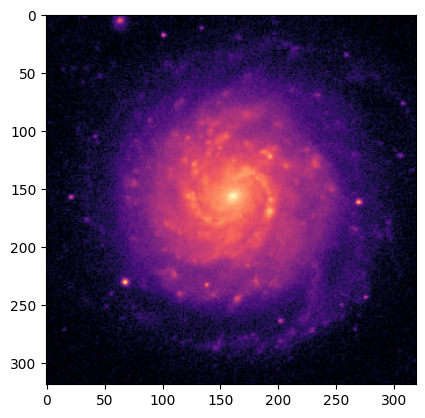

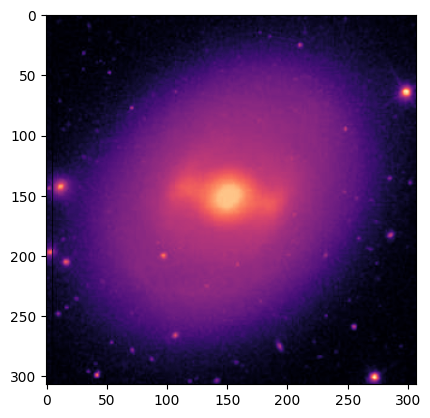

In [2]:
spiralf = np.asarray(Image.open('spiral.jpeg'))
spiralf = np.mean(spiralf,axis=2)/np.max(spiralf)#spiral[:,:,0]/spiral[:,:,0].max()
spiralf = spiralf[1:,1:] #for some reason, skipping this step means that flattened array mask applies to this array??
#spiral = spiral[:-1,45:257 ]

barf = np.asarray(Image.open('ngc936.jpg'))
#bar = bar[:,:,0]/bar[:,:,0].max()
barf = np.mean(barf, axis=2)
barf = barf/barf.max()
barf = barf[13:, 13:]
print(spiralf.shape, barf.shape)


plt.imshow(spiralf, cmap='magma')
plt.figure()
plt.imshow(barf, cmap='magma')

(307, 307) 1.0
(307, 307) 1.0
returning coscoefs, sincoefs


ValueError: operands could not be broadcast together with shapes (4605,4605) (307,307) 

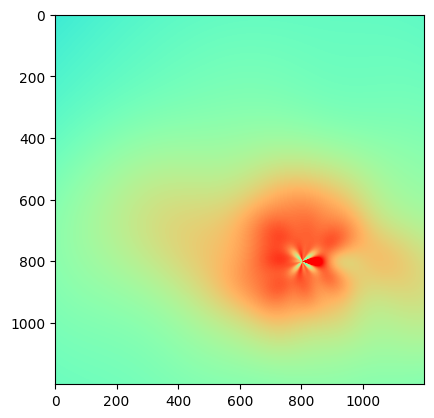

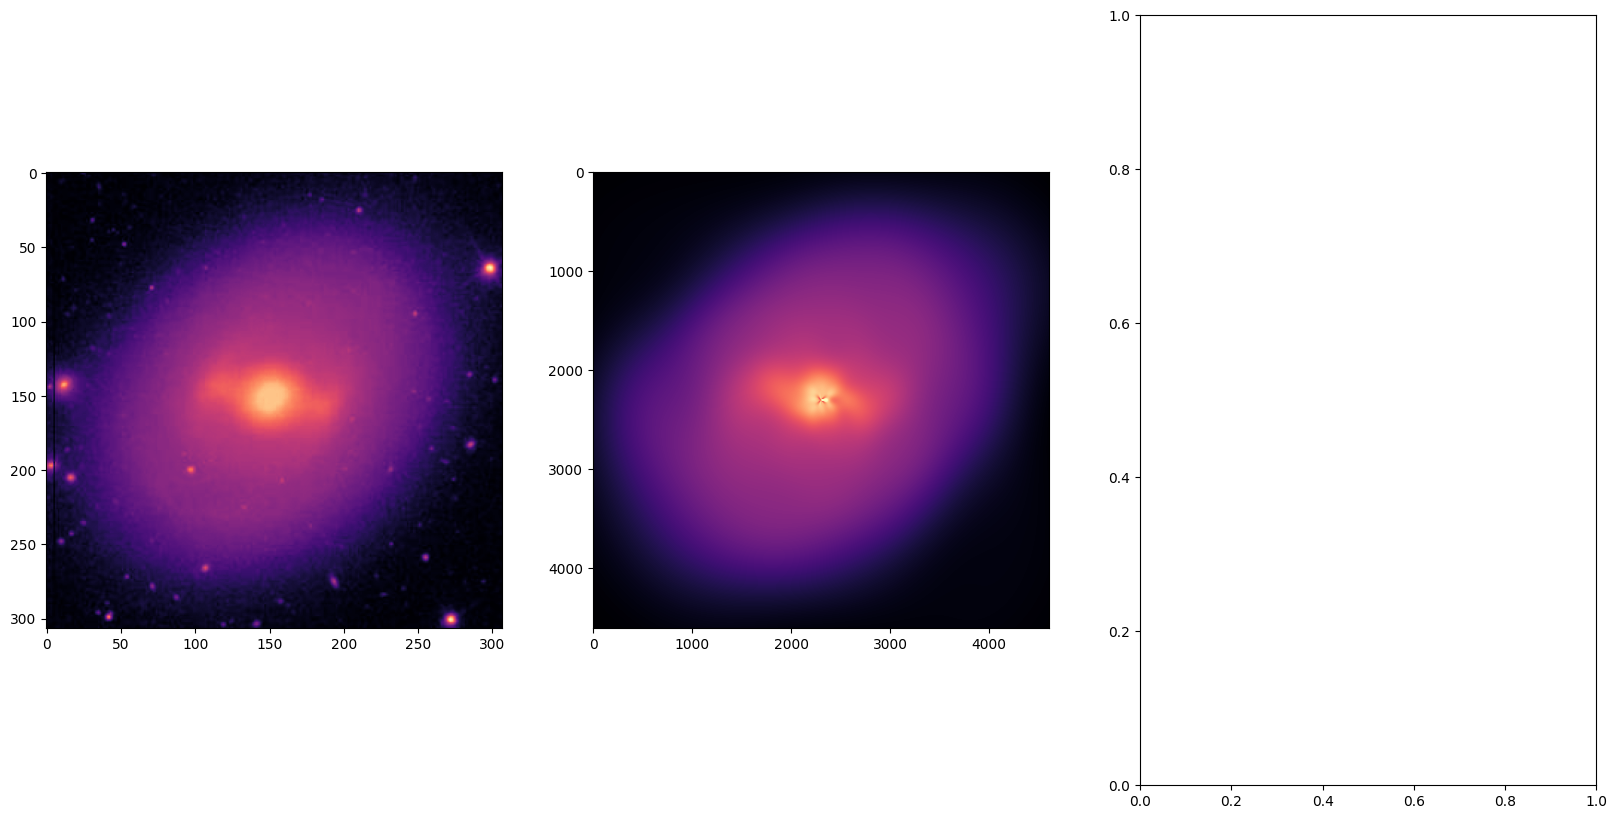

In [4]:
s = 1 #8 #8 is p good for nmax = 11
bar = resize_local_mean(barf, (int(s*barf.shape[0]),int(s*barf.shape[0])))
#bar = barf.copy()
#rescale(barf, 1.2,anti_aliasing=True)#warp_polar(barf, output_shape = (400,400))
xp = np.linspace(-bar.shape[0]/2.,bar.shape[0]/2.,bar.shape[0])
xpix,ypix = np.meshgrid(xp,xp)
rr,pp = np.sqrt(xpix**2+ypix**2),np.arctan2(ypix,xpix)
    
    
rval = np.sqrt(xpix**2+ypix**2).reshape(-1,)
phi  = np.arctan2(ypix,xpix).reshape(-1,)
barflat = bar.reshape(-1,).copy() #need a copy

# pick a radius to not consider outside of
gvals = np.where(rval>200*s)
    
rval[gvals]         = np.nan
phi[gvals]          = np.nan
print(bar.shape, bar.max())
barflat[gvals] = np.nan
    
print(bar.shape, bar.max())
# pick orders for the expansion
mmax = 8  
nmax = 12 #12 


# pick a scalelength for the reconstruction
rscl = 15 #20#10

# make the expansion and compute the weights
####LG = LaguerreAmplitudes(rscl,np.ones(rval.size),phi,barflat,rval,mmax,nmax)
# rscl, mmax, nmax, R, phi, mass=1., velocity=1.
LG = LaguerreAmplitudes(rscl,mmax,nmax,rval,phi,barflat)
c_bar, s_bar = LG.laguerre_amplitudes_returns()


tt = 15
supsamp_xp = np.linspace(-bar.shape[0]/2.,bar.shape[0]/2.,bar.shape[0]*tt)
supsamp_xpix, supsamp_ypix = np.meshgrid(supsamp_xp,supsamp_xp)
supsamp_rr,supsamp_pp = np.sqrt(supsamp_xpix**2+supsamp_ypix**2),np.arctan2(supsamp_ypix,supsamp_xpix)
    
LG.laguerre_reconstruction(supsamp_rr,supsamp_pp)
    #100:300
plt.figure()
plt.imshow((LG.reconstruction)[100*tt:180*tt,100*tt:180*tt],vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap='rainbow')
    
    # make a figure for the comparison
# make a figure for the comparison
fig = plt.figure(figsize=(20,10),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

cval = np.linspace(-5.,1.,32)
ax1.imshow((bar), cmap=plt.cm.magma)
ax2.imshow((LG.reconstruction),vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap=cm.magma)

# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((LG.reconstruction-bar)/bar,vmin=-.25,vmax=.25,cmap=cm.magma)

ax1.set_title('log surface density')
ax2.set_title('expanded surface density')
ax3.set_title('relative uncertainty')

'''
##### ------ maybe got to the bottom of this - everything looks better if big resampled 
bar = barf
xp = np.linspace(-bar.shape[0]/2.,bar.shape[0]/2.,bar.shape[0])
xpix,ypix = np.meshgrid(xp,xp)
rr,pp = np.sqrt(xpix**2+ypix**2),np.arctan2(ypix,xpix)
    
    
rval = np.sqrt(xpix**2+ypix**2).reshape(-1,)
phi  = np.arctan2(ypix,xpix).reshape(-1,)
barflat = bar.reshape(-1,).copy() #need a copy
    
# pick a radius to not consider outside of
gvals = np.where(rval>200)
    
rval[gvals]         = np.nan
phi[gvals]          = np.nan
print(bar.shape, bar.max())
barflat[gvals] = np.nan
    
 
# pick a scalelength for the reconstruction
rscl = int(20)#10
print(rscl, barf.shape)
# make the expansion and compute the weights
LG = LaguerreAmplitudes(rscl,np.ones(rval.size),phi,barflat,rval,mmax,nmax)
c_bar, s_bar = LG.laguerre_amplitudes_returns()
    
    
LG.laguerre_reconstruction(rr,pp)
    #100:300
plt.figure()
plt.imshow((LG.reconstruction)[100:180,100:180],vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap='rainbow')
    
    # make a figure for the comparison
# make a figure for the comparison
fig = plt.figure(figsize=(20,10),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

cval = np.linspace(-5.,1.,32)
ax1.imshow((bar), cmap=plt.cm.magma)
ax2.imshow((LG.reconstruction),vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap=cm.magma)

# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((LG.reconstruction-bar)/bar,vmin=-.25,vmax=.25,cmap=cm.magma)

ax1.set_title('log surface density')
ax2.set_title('expanded surface density')
ax3.set_title('relative uncertainty')
'''

In [ ]:
#what if we have 24 n's to ensure that we preserve structure mapping but then we truncate to first 12?
#actually - the bar reconstruction isnt much better with 24

In [10]:
np.save('bar_coscoeffs.npy', c_bar)
np.save('bar_sincoeffs.npy', s_bar)

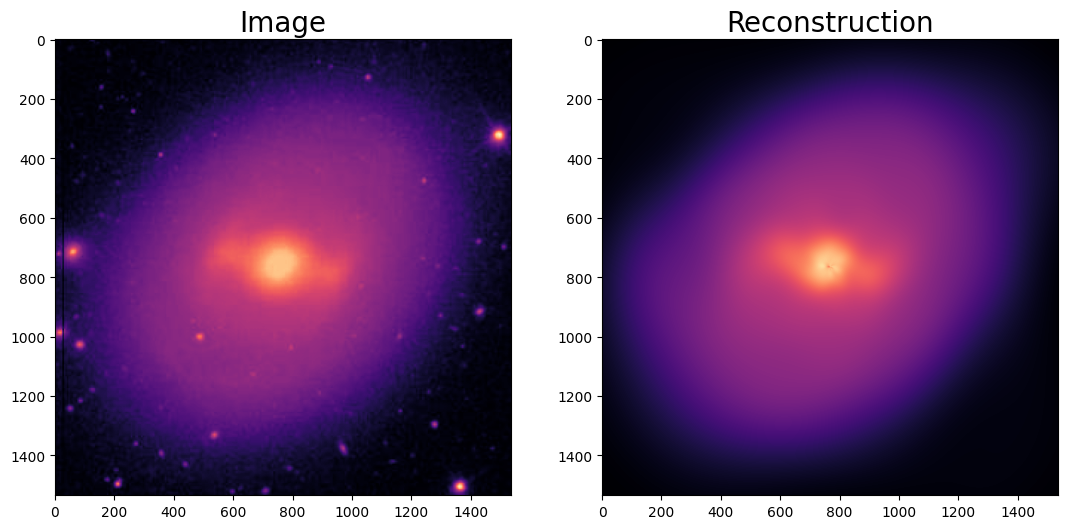

In [11]:
fig = plt.figure(figsize=(20,10),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

cval = np.linspace(-5.,1.,32)
ax1.imshow((bar), cmap=plt.cm.magma)
ax2.imshow((LG.reconstruction),vmin=np.nanmin(bar), vmax=np.nanmax(bar),cmap=cm.magma)

# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((LG.reconstruction-bar)/bar,vmin=-.25,vmax=.25,cmap=cm.magma)

ax1.set_title('Image',fontsize=20)
ax2.set_title('Reconstruction',fontsize=20)
plt.savefig('example.jpeg', bbox_inches = 'tight',
    pad_inches = 0) 


# Spiral -

(1595, 1595) 0.8644536652835408
(1595, 1595) 0.8644536652835408
returning coscoefs, sincoefs


/var/folders/l4/60k630dd5bj2p5fwtj1gg3zc0000gn/T/ipykernel_43892/3186660538.py:52: RuntimeWarning: divide by zero encountered in divide
  ax3.imshow((LG.reconstruction-spiral)/spiral,vmin=-.25,vmax=.25,cmap=cm.magma)


Text(0.5, 1.0, 'relative uncertainty')

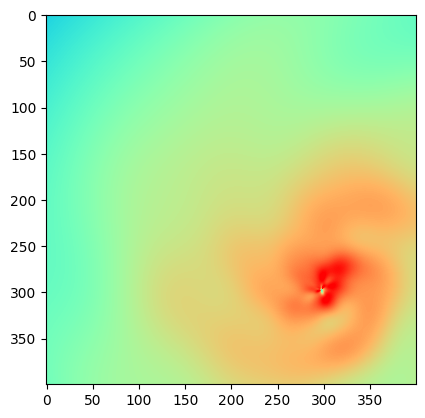

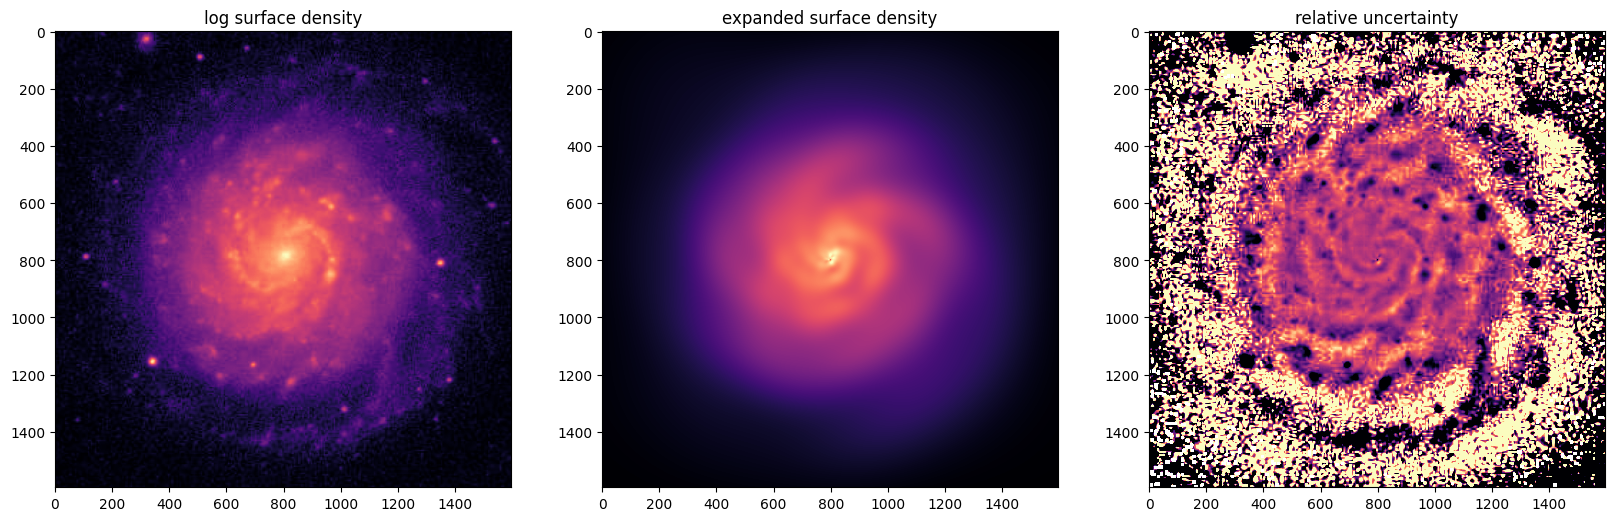

In [68]:
s = 5 ########### was 5
spiral = resize_local_mean(spiralf, (int(s*spiralf.shape[0]),int(s*spiralf.shape[0])))
#rescale(spiralf, 1.2,anti_aliasing=True)#warp_polar(spiralf, output_shape = (400,400))
xp = np.linspace(-spiral.shape[0]/2.,spiral.shape[0]/2.,spiral.shape[0])
xpix,ypix = np.meshgrid(xp,xp)
rr,pp = np.sqrt(xpix**2+ypix**2),np.arctan2(ypix,xpix)
    
    
rval = np.sqrt(xpix**2+ypix**2).reshape(-1,)
phi  = np.arctan2(ypix,xpix).reshape(-1,)
spiralflat = spiral.reshape(-1,).copy() #need a copy

# pick a radius to not consider outside of
gvals = np.where(rval>210*s)
    
rval[gvals]         = np.nan
phi[gvals]          = np.nan
print(spiral.shape, spiral.max())
spiralflat[gvals] = np.nan
    
print(spiral.shape, spiral.max())
# pick orders for the expansion
mmax = 8 #8
nmax = 12 ###21 #24 #
    
# pick a scalelength for the reconstruction
rscl = 10.*s #10 was 20
    
# make the expansion and compute the weights
###LG = LaguerreAmplitudes(rscl,np.ones(rval.size),phi,spiralflat,rval,mmax,nmax)
LG = LaguerreAmplitudes(rscl,mmax,nmax,rval,phi,spiralflat)
c_spiral, s_spiral = LG.laguerre_amplitudes_returns()
    
    
LG.laguerre_reconstruction(rr,pp)
    #100:300
plt.figure()
plt.imshow((LG.reconstruction)[100*s:180*s,100*s:180*s],vmin=np.nanmin(spiral), vmax=np.nanmax(spiral),cmap='rainbow')
    
    # make a figure for the comparison
# make a figure for the comparison
fig = plt.figure(figsize=(20,10),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

cval = np.linspace(-5.,1.,32)
ax1.imshow((spiral), cmap=plt.cm.magma)
ax2.imshow((LG.reconstruction),vmin=np.nanmin(spiral), vmax=np.nanmax(spiral),cmap=cm.magma)

# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((LG.reconstruction-spiral)/spiral,vmin=-.25,vmax=.25,cmap=cm.magma)

ax1.set_title('log surface density')
ax2.set_title('expanded surface density')
ax3.set_title('relative uncertainty')

In [69]:
#reconstruction for spiral is uch better with higher n

In [70]:
np.save('spiral_coscoeffs.npy', c_spiral)
np.save('spiral_sincoeffs.npy', s_spiral)

# looking at Mike's -

In [22]:
snapshot

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

0.07357311248779297


/var/folders/l4/60k630dd5bj2p5fwtj1gg3zc0000gn/T/ipykernel_75705/2287441476.py:32: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(laguerre.reconstruction),cmap=cm.magma)


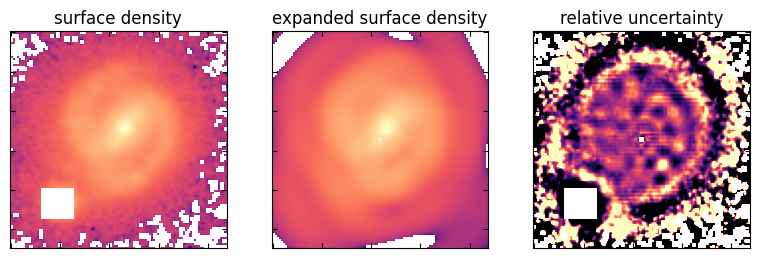

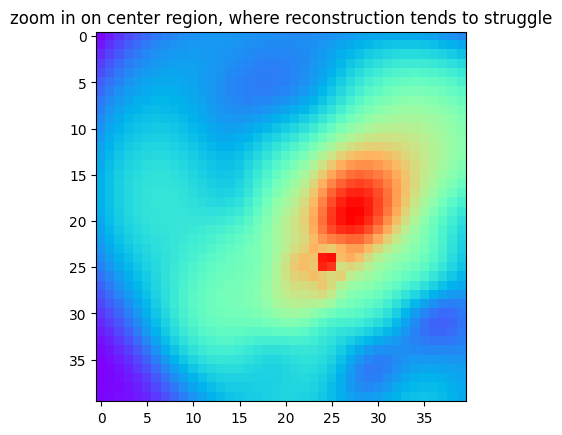

In [43]:
# load in the data file
snapshot = np.load('CEERSbar1.npy')
snapshot = snapshot/np.nanmax(snapshot)
# construct the grid for the image
xp = np.linspace(-55.,55.,110)
xpix,ypix = np.meshgrid(xp,xp)
rr,pp = np.sqrt(xpix**2+ypix**2),np.arctan2(ypix,xpix)
rval = np.sqrt(xpix**2+ypix**2).reshape(-1,)
phi = np.arctan2(ypix,xpix).reshape(-1,)
snapshotflat = snapshot.copy().reshape(-1,)
# pick a radius to not consider outside of
gvals = np.where(rval>100.)
rval[gvals] = np.nan
phi[gvals] = np.nan
snapshotflat[gvals] = np.nan
# pick orders for the expansion
mmax = 8
nmax = 24
# pick a scalelength for the reconstruction
rscl = 12.
t1 = time.time()
laguerre = LaguerreAmplitudes(rscl,mmax,nmax,rval,phi,snapshotflat)
# reconstruct the image at specified grid points (the same as the image points)
laguerre.laguerre_reconstruction(rr,pp)
print(time.time()-t1)
# make a figure for the comparison
fig = plt.figure(figsize=(8,2.6),facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(np.log10(snapshot),cmap=plt.cm.magma)
ax2.imshow(np.log10(laguerre.reconstruction),cmap=cm.magma)
# plot the relative uncertainty (maxed out at 25 percent)
ax3.imshow((laguerre.reconstruction-snapshot)/snapshot,vmin=-.25, vmax=.25, cmap=cm.magma)
ax1.set_title('surface density')
ax2.set_title('expanded surface density')
ax3.set_title('relative uncertainty')
for ax in [ax1,ax2,ax3]:
    #ax.axis([-55,55,-55,55])
    ax.set_xticklabels(())
    ax.set_yticklabels(())
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
plt.tight_layout()
plt.savefig('jwst_expansion1.png',dpi=300)



plt.figure()
plt.title('zoom in on center region, where reconstruction tends to struggle')
plt.imshow(np.log10(laguerre.reconstruction[30:70,30:70]),cmap='rainbow')

In [31]:
#300x300, mikes was 110 x 110, rscale = 12 so like ~1/10

(110, 110)